# **Importing library**

In [1]:
# Importing libraries for datasets manipulation and exploration
import pandas as pd
import numpy as np
import sqlite3

# Importing libraries for graphs plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Importing libraries to hide Future Warnings
import warnings
warnings.filterwarnings('ignore')

# Import other usefull libraries
import math
import datetime

# **Loading dataset**

In [2]:
# Loading databse
con = sqlite3.connect("olist_ecommerce.db")
cursor = con.cursor()

In [3]:
# Creating a dataframe from a query
df = pd.read_sql_query(
    """ SELECT *
    
        FROM olist_products_dataset AS products
        
        INNER JOIN olist_order_items_dataset AS items ON products.product_id = items.product_id
        INNER JOIN olist_orders_dataset AS orders ON items.order_id = orders.order_id
        INNER JOIN olist_order_reviews_dataset AS reviews ON orders.order_id = reviews.order_id
        INNER JOIN olist_customers_dataset AS customer ON orders.customer_id = customer.customer_id""",
        con
        )

# **Data preparation and overview**

In [4]:
# Creating function to get a summary of the dataset
def features_summary(dataframe):

# Creating dictionary to store information
  dict_info = {""             : [], 
               "dtypes"       : [],  
               "Unique Values": [],
               "NUniques"     : [],  
               "NaN values"   : [],
               "Mean"         : [],
               "Min"          : [],
               "Max"          : [],
              }

  # Assigning feature information to the DataFrame
  for col in dataframe.columns:

    # Feature name
    dict_info[''].append(col)

    # Feature dtype
    dict_info['dtypes'].append(dataframe[col].dtypes)

    # Unique values in the feature
    dict_info["Unique Values"].append(dataframe[col].unique())

    # Number of unique values in the feature
    dict_info["NUniques"].append(dataframe[col].nunique())

    # Getting the average, minimum value and maximum value of the feature
    if (dataframe[col].dtypes == object) or (dataframe[col].nunique() == 2):
      dict_info["Mean"].append('-')
      dict_info["Min"].append(dataframe[col].unique()[0])                               
      dict_info["Max"].append(dataframe[col].unique()[1])

    elif (dataframe[col].dtypes == np.datetime64):
      dict_info["Mean"].append('-')
      dict_info["Min"].append(dataframe[col].unique()[0])                               
      dict_info["Max"].append(dataframe[col].unique()[1])
    
    else:
      dict_info["Mean"].append(dataframe[col].mean().round(2))
      dict_info["Min"].append(dataframe[col].min())                               
      dict_info["Max"].append(dataframe[col].max())

    # Checking the number of existing NaNs inside the feature
    dict_info["NaN values"].append(dataframe[col].isna().sum())

  # Transforming dictionary into dataframe
  info = pd.DataFrame.from_dict(data = dict_info)

  # Defining the index
  info.set_index("", inplace=True)

  # Displaying information
  return info

In [5]:
# Eliminanting duplicated columns
df = df.loc[:,~df.columns.duplicated()].copy()

# Showing DataFrame first rows
df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,00010242fe8c5a6d1ba2dd792cb16214,...,97ca439bc427b48bc1cd7177abe71365,5,None,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,e5f2d52b802189ee658865ca93d83a8f,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,00018f77f2f0320c557190d7a144bdd3,...,7b07bacd811c4117b742569b04ce3580,4,None,None,2017-05-13 00:00:00,2017-05-15 11:34:13,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,000229ec398224ef6ca0657da4fc703e,...,0c5b33dea94867d1ac402749e5438e8b,5,None,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,7634da152a4610f1595efa32f14722fc,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,00024acbcdf0a6daa1e931b038114c75,...,f4028d019cb58564807486a6aaf33817,4,None,None,2018-08-15 00:00:00,2018-08-15 16:39:01,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,00042b26cf59d7ce69dfabb4e55b4fd9,...,940144190dcba6351888cafa43f3a3a5,5,None,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [6]:
# Verifying columns names
df.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'order_id', 'order_item_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state'],
      dtype='object')

In [7]:
# Removing unnecessary columns
df.drop(columns=['product_id','product_name_lenght', 'product_weight_g', 'product_length_cm', 
                 'product_height_cm', 'product_width_cm',  'order_id', 
                 'order_item_id', 'seller_id', 'customer_id', 'customer_unique_id'], inplace=True)

In [8]:
# Ordering columns
df = df[['review_id','product_category_name', 'product_description_lenght',
         'product_photos_qty','price', 'freight_value', 'shipping_limit_date', 
         'order_purchase_timestamp', 'order_approved_at',
         'order_delivered_carrier_date', 'order_delivered_customer_date',
         'order_estimated_delivery_date', 'review_creation_date', 
         'review_answer_timestamp', 'order_status', 'customer_zip_code_prefix',
         'customer_city', 'customer_state', 'review_score',
         'review_comment_title', 'review_comment_message']]

In [9]:
# Displaying information
features_summary(df)

,dtypes,Unique Values,NUniques,NaN values,Mean,Min,Max
,,,,,,,
review_id,object,"[97ca439bc427b48bc1cd7177abe71365, 7b07bacd811...",98453,0,-,97ca439bc427b48bc1cd7177abe71365,7b07bacd811c4117b742569b04ce3580
product_category_name,object,"[cool_stuff, pet_shop, moveis_decoracao, perfu...",73,1612,-,cool_stuff,pet_shop
product_description_lenght,float64,"[598.0, 239.0, 695.0, 480.0, 409.0, 558.0, 815...",2960,1612,786.88,4.0,3992.0
product_photos_qty,float64,"[4.0, 2.0, 1.0, 3.0, 5.0, 8.0, 7.0, 9.0, 6.0, ...",19,1612,2.21,1.0,20.0
price,float64,"[58.9, 239.9, 199.0, 12.99, 199.9, 21.9, 19.9,...",5968,0,120.48,0.85,6735.0
freight_value,float64,"[13.29, 19.93, 17.87, 12.79, 18.14, 12.69, 11....",6999,0,19.98,0.0,409.68
shipping_limit_date,object,"[2017-09-19 09:45:35, 2017-05-03 11:05:13, 201...",93318,0,-,2017-09-19 09:45:35,2017-05-03 11:05:13
order_purchase_timestamp,object,"[2017-09-13 08:59:02, 2017-04-26 10:53:06, 201...",98112,0,-,2017-09-13 08:59:02,2017-04-26 10:53:06
order_approved_at,object,"[2017-09-13 09:45:35, 2017-04-26 11:05:13, 201...",90174,15,-,2017-09-13 09:45:35,2017-04-26 11:05:13


In [10]:
# Transforming "review_comment_title" and "review_comment_message" data type to string
df = df.astype({ "review_comment_title": str,
                 "review_comment_message": str})

# Transforming date features to datetime type 
date_features = ['shipping_limit_date', 
                 'order_purchase_timestamp', 'order_approved_at',
                 'order_delivered_carrier_date', 'order_delivered_customer_date',
                 'order_estimated_delivery_date', 'review_creation_date', 
                 'review_answer_timestamp']

df[date_features] = df[date_features].apply(pd.to_datetime)

In [11]:
# Calculating the number of days between the purchase and the review of each product
df['day_diff'] = (df['review_creation_date'] - df['order_approved_at']).dt.days

## **Exploratory Data Analysis**

In [12]:
# Creating function to plot Box Plot charts 
def plotBox(numerical_features, y_target, dataframe):
  
    # Number of columns
    number_of_columns = 2

    # Number of rows
    number_of_rows = math.ceil(len(numerical_features)/2)

    # Creating figure that will support the charts
    fig = plt.figure(figsize=(20, 10 * number_of_rows))

    # Loop para criação dos gráficos das features escolhidas
    for index, col in enumerate(numerical_features, 1):

        # Creating subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        sns.boxplot(x = y_target, y = col, data = dataframe)

        # Defining title
        ax.set_title(col, fontsize=16, loc='center')
        
        # Deleting parts of the frame in the charts
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

In [13]:
def plotBar(feature, y_target, dataframe):
    # Creating subplot
    fig, ax = plt.subplots(figsize=(20,15))
    sns.barplot(y = feature, x = y_target, data = dataframe)

    # Defining title
    ax.set_title(f'{feature}', fontsize=16, loc='center')

    # Deleting parts of the frame in the charts
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

As we can see in the [Olist Sales Dashboard](https://public.tableau.com/app/profile/vinicius.de.andrade.costa/viz/Sales_Dashboard_16645471881110/Painel1), it is noticeable how e-commerce increased significantly between the years 2017 and 2018 according to the Olist dataset.

Although, we have not yet analyzed the interactions between order reviews and variables such as item price, shipping price, customer state and city, etc.

So let's take a look at this!

#### How the Review Scores are distributed?

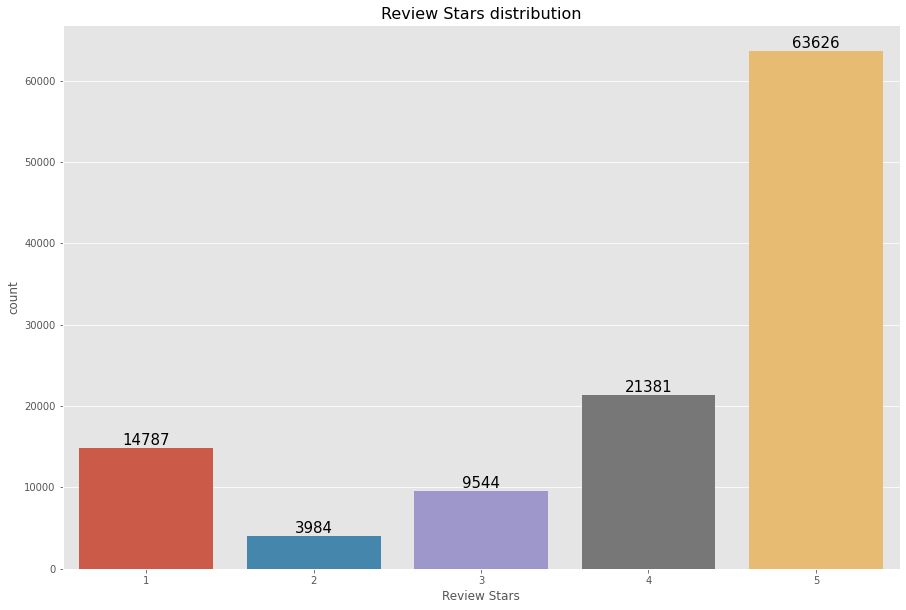

In [14]:
# Plotting the Review Score ("overall") distribution
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.countplot(data = df, x = 'review_score')

ax.bar_label(ax.containers[0], fontsize=15)
ax.set_title('Review Stars distribution', fontsize=16, loc='center')
ax.set_xlabel('Review Stars')

plt.legend([],[], frameon=False)
plt.show()

Although most reviews are positive (scores 4 and 5), the number of negative reviews (scores 1 and 2) represents a considerable number. Let's check if there is a correlation between reviews and other features.

#### *Review Score* is affected by the features *product_description_lenght, product_photos_qty, price and freight_value*?

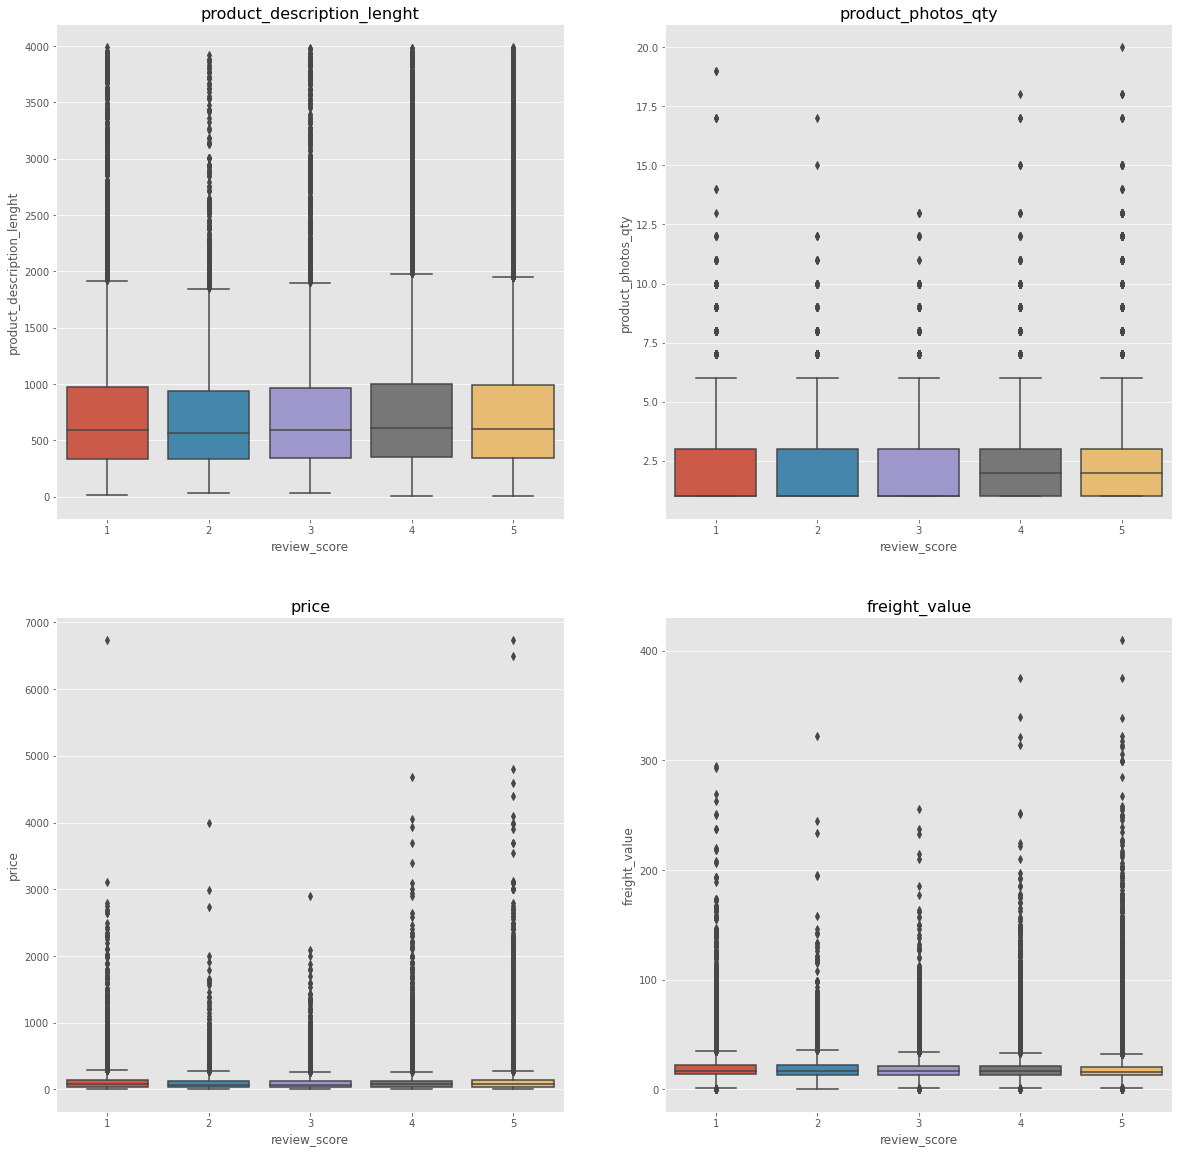

In [15]:
# Defining  features to be analyzed
features = ['product_description_lenght', 'product_photos_qty', 'price', 'freight_value']

# Defining target feature
target = 'review_score'

# Plotting BoxPLot charts 
plotBox(features, target, df)

In [16]:
mean_df = df.pivot_table(values  = ['product_description_lenght', 'product_photos_qty', 'price', 'freight_value'], 
                                     columns = 'review_score', 
                                     aggfunc = 'mean'
                                     ).T.reset_index().sort_values(by='review_score', ascending=False)

mean_df

,review_score,freight_value,price,product_description_lenght,product_photos_qty
4,5,19.571507,121.239487,792.440636,2.221990
3,4,20.058315,118.831879,793.407922,2.238994
2,3,20.253341,110.101790,770.496929,2.230354
1,2,20.841227,115.304741,735.177897,2.153139
0,1,21.213229,127.698079,777.952443,2.093733


By the informations above we can conclude:

- There is a small difference description length between the positive and negative scores. With the positive ones having a slightly higher numbers in average
- Higher price and freight_value may have a correlation to lower scores.

Although there are some diferences in the features means and general values, they are not that distant from each other.

#### **How the estimated delivery time and the delivery time itself are related to the reviews?**

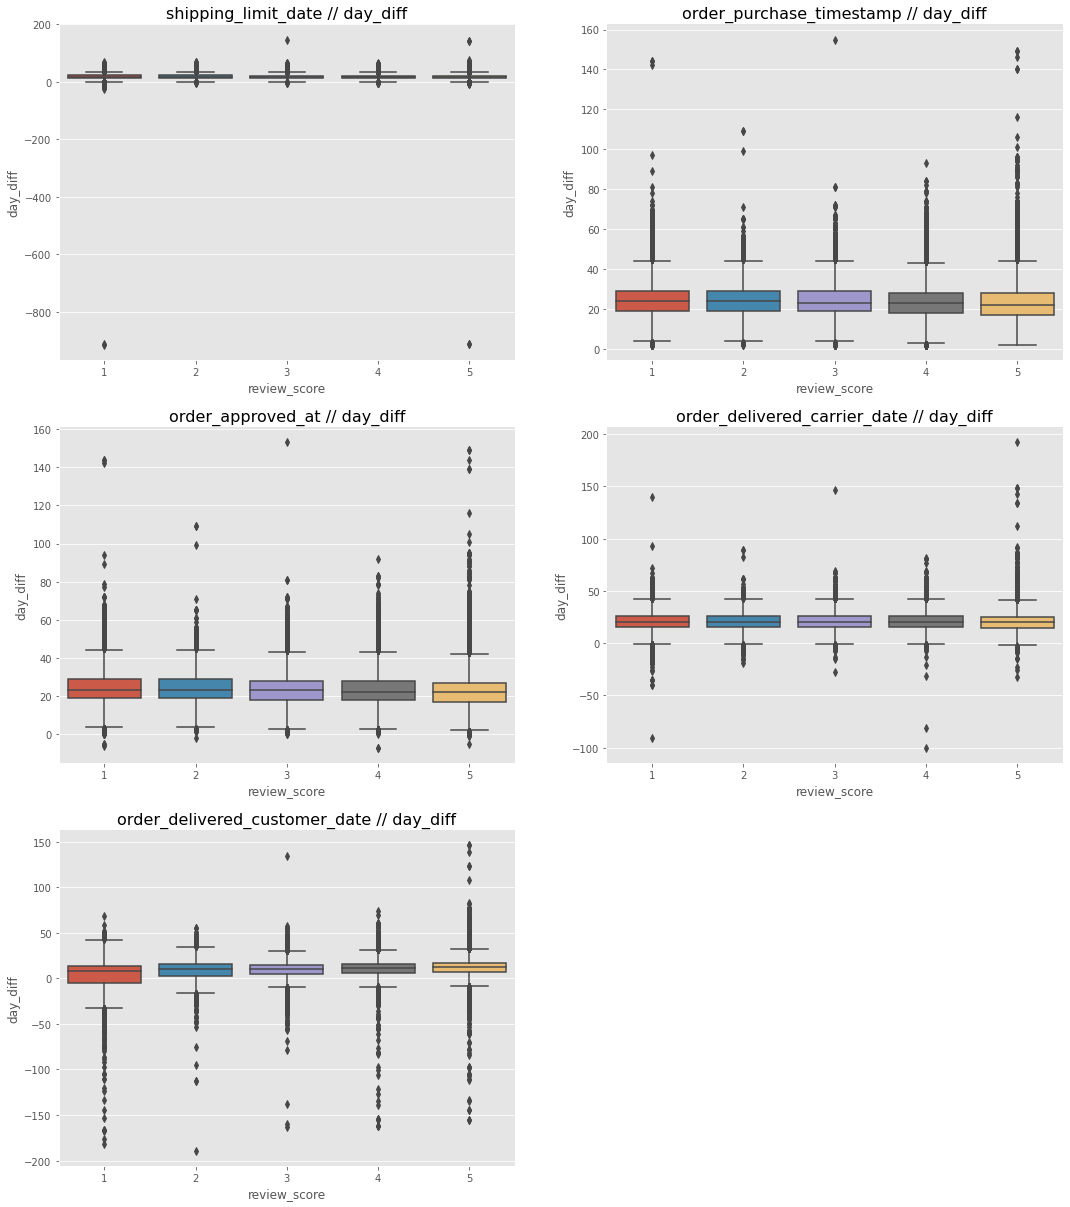

In [31]:
df_date = df[['shipping_limit_date', 
              'order_purchase_timestamp', 'order_approved_at',
              'order_delivered_carrier_date', 'order_delivered_customer_date',
              'order_estimated_delivery_date', 'review_creation_date', 
              'review_answer_timestamp', 'review_score']]

date_columns = ['shipping_limit_date', 
                'order_purchase_timestamp', 'order_approved_at',
                'order_delivered_carrier_date', 'order_delivered_customer_date']

# Número de colunas
number_of_columns = 2

# Número de linhas
number_of_rows = math.ceil(len(date_columns)/2)

# Criando figura que irá comportar os gráficos
fig = plt.figure(figsize=(18, 7 * number_of_rows))
    
    
# Loop para criação dos gráficos das features escolhidas
for index, col in enumerate(date_columns, 1):
    df_date['day_diff'] = (df_date['order_estimated_delivery_date'] - df_date[col]).dt.days
    
    # Criando subplot
    ax = fig.add_subplot(number_of_rows, number_of_columns, index)
    sns.boxplot(x = 'review_score', y = 'day_diff', data = df_date)

    # Definindo título
    ax.set_title(f'{col} // day_diff', fontsize=16, loc='center')

    # Eliminando partes do frame no gráfico
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

Despite the days diference between the **order_delivery_date** and **order_estimated_delivery_date**, in which orders that have taken too long to be deliveried and/or were deliveried after the **order_estimated_delivery_date** the scores presents a trend to be slightly lower.

#### How diferent are the review scores between the Product Categories?

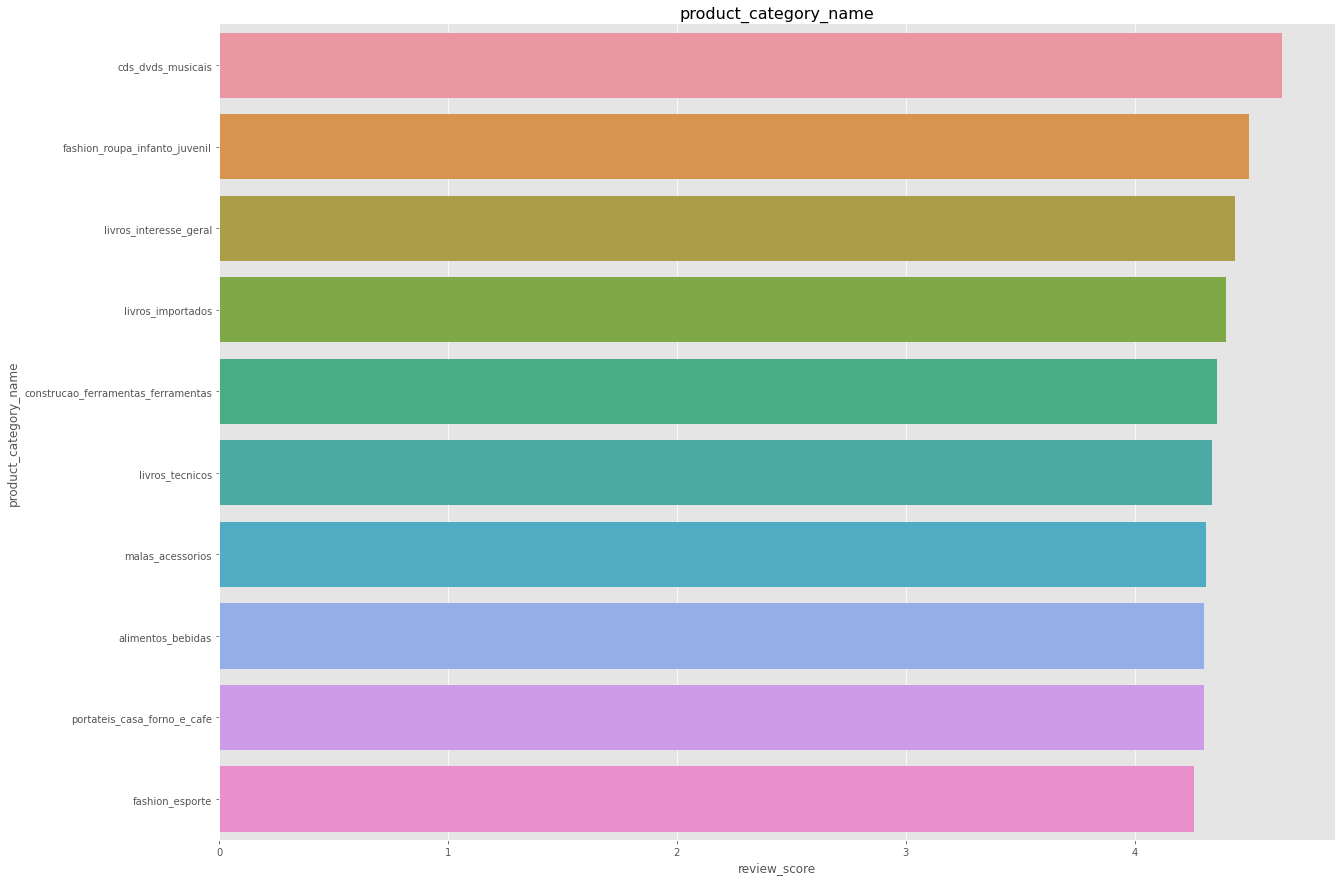

In [18]:
# Calculating Review Score mean per Product Category
mean_df_category = df.pivot_table(values  = 'review_score', 
                                  columns = 'product_category_name', 
                                  aggfunc = 'mean'
                                  ).T.reset_index().sort_values(by='review_score', ascending=False)
# Top 10 products 
top_df_category = mean_df_category.head(10)

# Plotting barplot with Review Score per Product Category
plotBar(feature   = 'product_category_name',
        y_target  = 'review_score',
        dataframe = top_df_category)

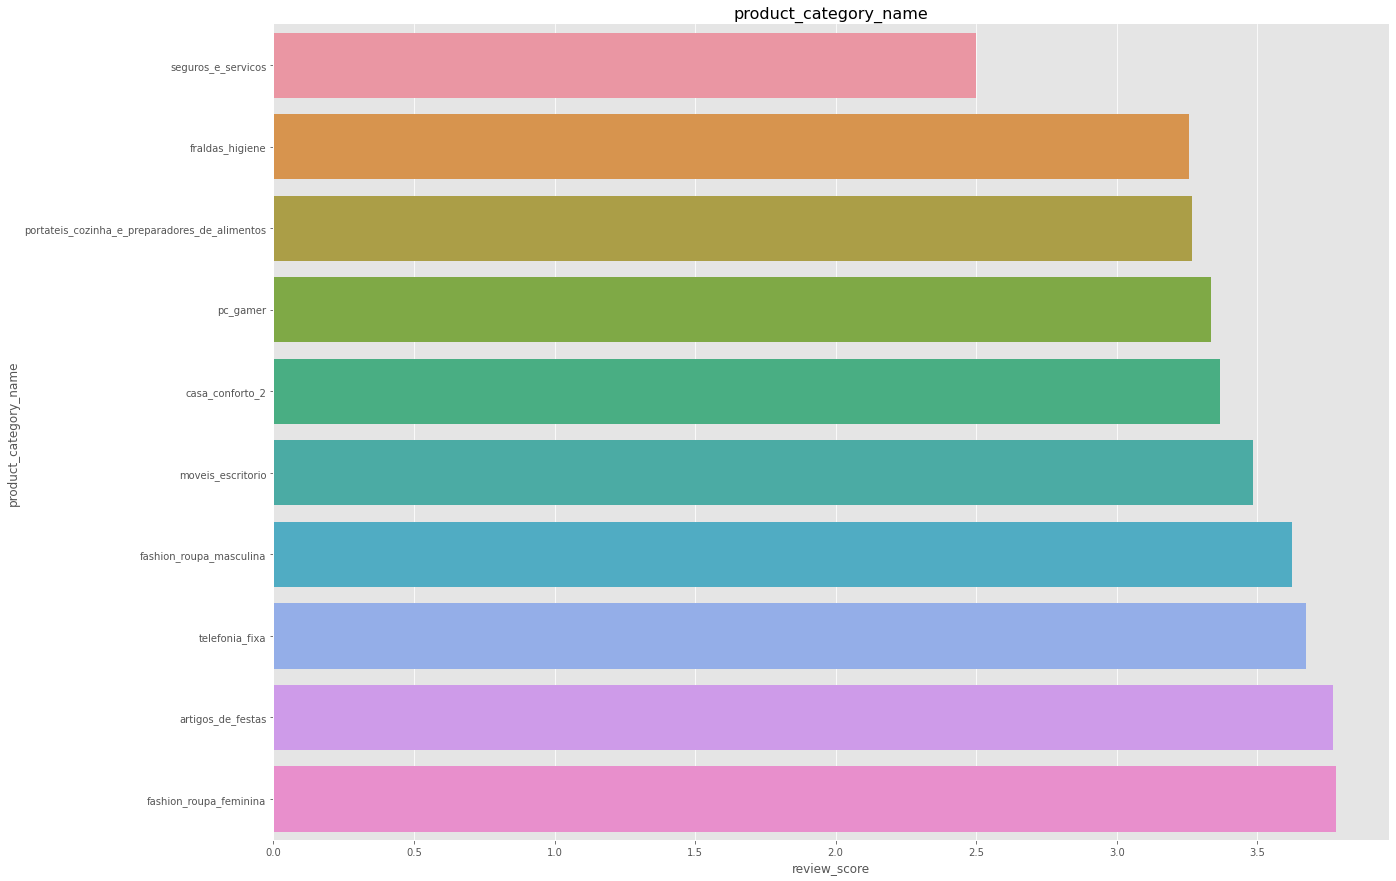

In [19]:
# Bottom 10 products 
bot_df_category = mean_df_category.sort_values(by='review_score', ascending=True).head(10)

# Plotting barplot with Review Score per Product Category
plotBar(feature   = 'product_category_name',
        y_target  = 'review_score',
        dataframe = bot_df_category)

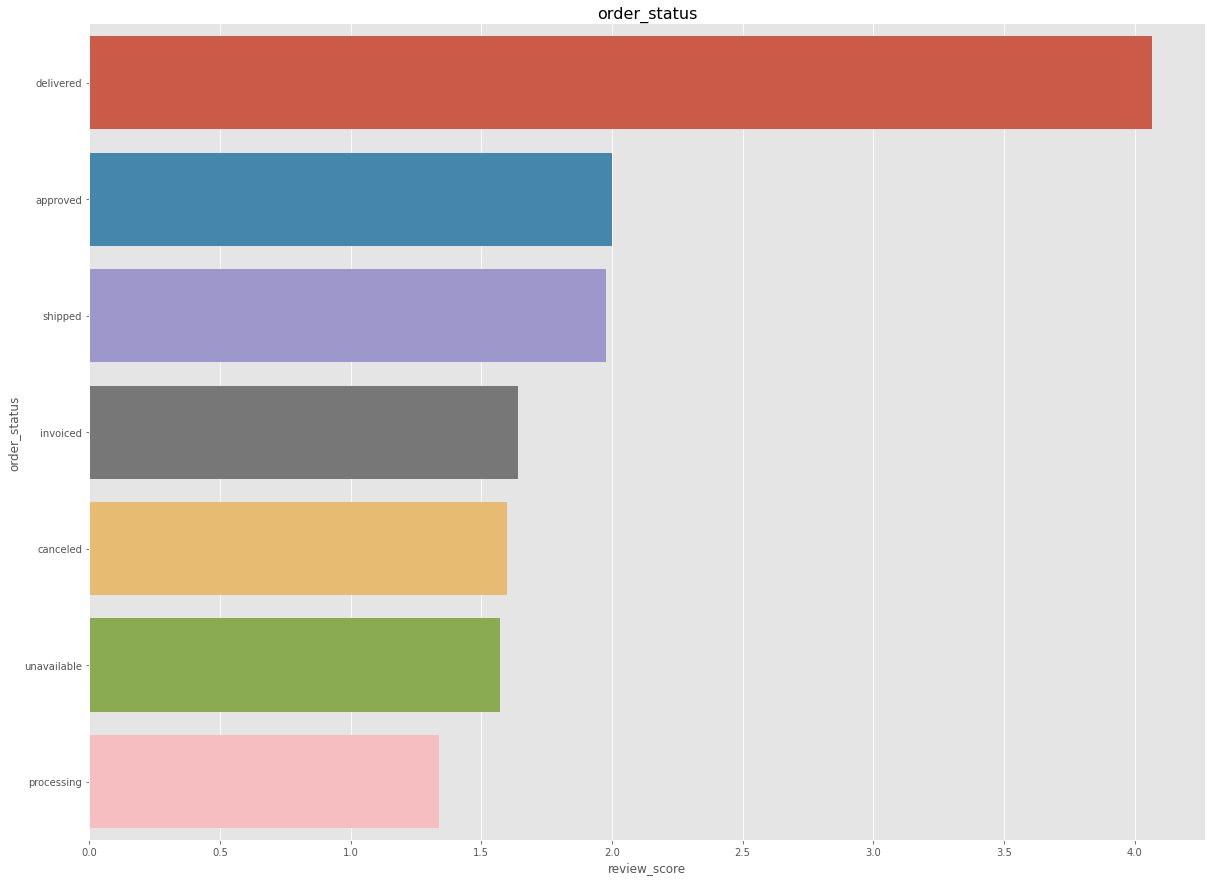

In [20]:
# Calculating Review Score mean per Order Status
mean_df_status = df.pivot_table(values  = 'review_score', 
                                columns = 'order_status', 
                                aggfunc = 'mean'
                                ).T.reset_index().sort_values(by='review_score', ascending=False)

# Plotting barplot with Review Score per Order Status
plotBar(feature   = 'order_status',
        y_target  = 'review_score',
        dataframe = mean_df_status)

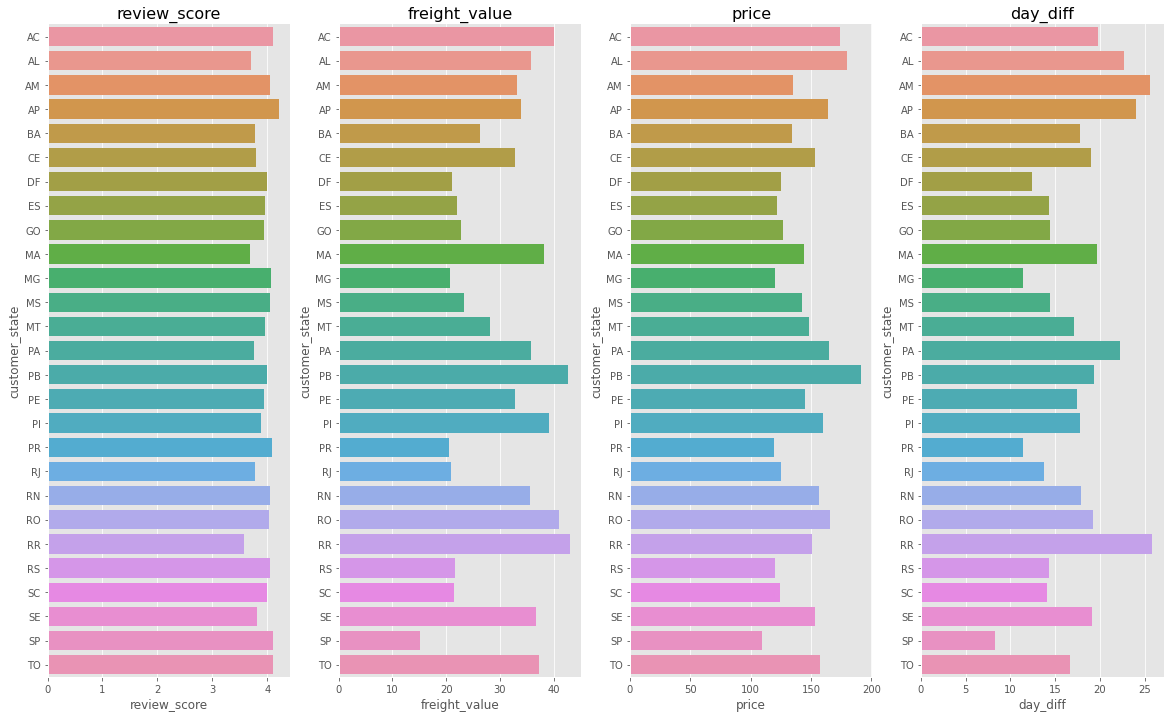

In [21]:
# Calculating means per Order Status per Customer State
mean_df_state = df.pivot_table(values  = ['review_score', 'freight_value', 'price', 'day_diff'], 
                               columns = 'customer_state', 
                               aggfunc = 'mean'
                               ).T.reset_index()

num_features = ['review_score', 'freight_value', 'price', 'day_diff']
target = 'customer_state'

# Criando figura que irá comportar os gráficos
fig = plt.figure(figsize=(20, 12))
    
    
# Loop para criação dos gráficos das features escolhidas
for index, col in enumerate(num_features, 1):
    # Criando subplot
    ax = fig.add_subplot(1, 4, index)
    sns.barplot(x = col, y = target, data = mean_df_state)

    # Definindo título
    ax.set_title(f'{col}', fontsize=16, loc='center')

    # Eliminando partes do frame no gráfico
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

In [22]:
# Top 5 per review_score
df.pivot_table(values  = ['review_score', 'freight_value', 'price', 'day_diff'], 
                           columns = 'customer_state', 
                           aggfunc = 'mean'
                           ).T.reset_index().sort_values(by='review_score', ascending=True).head()

,customer_state,day_diff,freight_value,price,review_score
21,RR,25.826923,42.984423,150.565962,3.576923
9,MA,19.672705,38.197865,144.564656,3.689988
1,AL,22.689732,35.744018,179.729397,3.698661
13,PA,22.290441,35.727518,164.942886,3.757353
4,BA,17.774607,26.345487,134.450937,3.782723


The trend towards high freight values, product prices and delivery times influencing the evaluation score and is maintained when evaluating customer state. Mainly in states further away from the Brazilian southeast such as MA, AL, PA and SE. With the state of Roraima as the one that leads all the features except product prices, in addition to having the worst average Review Score.

Remembering the information made available on the [Olist Sales Dashboard](https://public.tableau.com/app/profile/vinicius.de.andrade.costa/viz/Sales_Dashboard_16645471881110/Painel1), this problem of negative comments is probably related to the fact that the overwhelming majority of sellers are from the southeast of the country, mainly from the state of São Paulo.

# States with the worst score means

In [24]:
df_state = df[(df['customer_state'] == 'MA') | 
              (df['customer_state'] == 'AL') | 
              (df['customer_state'] == 'PA') | 
              (df['customer_state'] == 'SE') |
              (df['customer_state'] == 'RR') ]

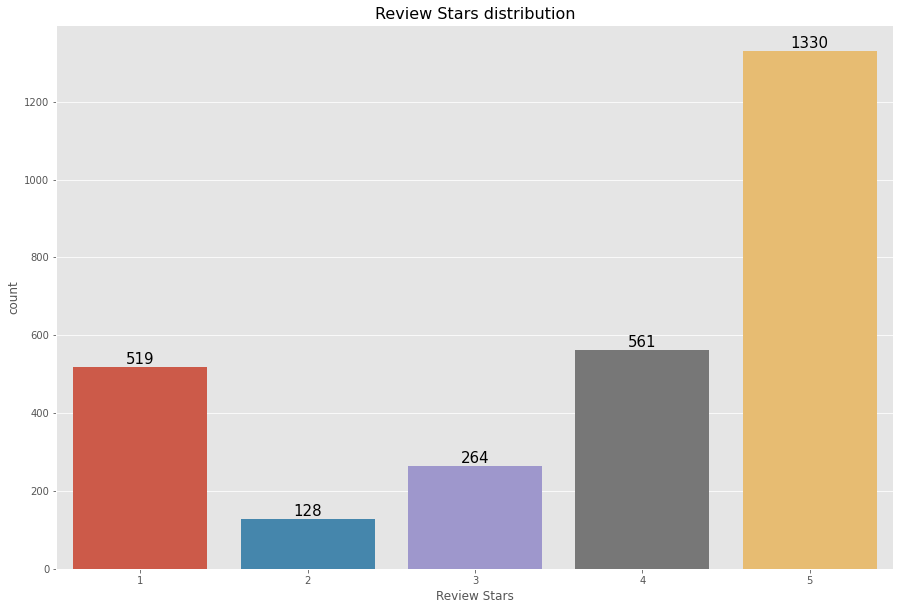

In [27]:
# Plotting the Review Score ("overall") distribution
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.countplot(data = df_state, x = 'review_score')

ax.bar_label(ax.containers[0], fontsize=15)
ax.set_title('Review Stars distribution', fontsize=16, loc='center')
ax.set_xlabel('Review Stars')

plt.legend([],[], frameon=False)
plt.show()

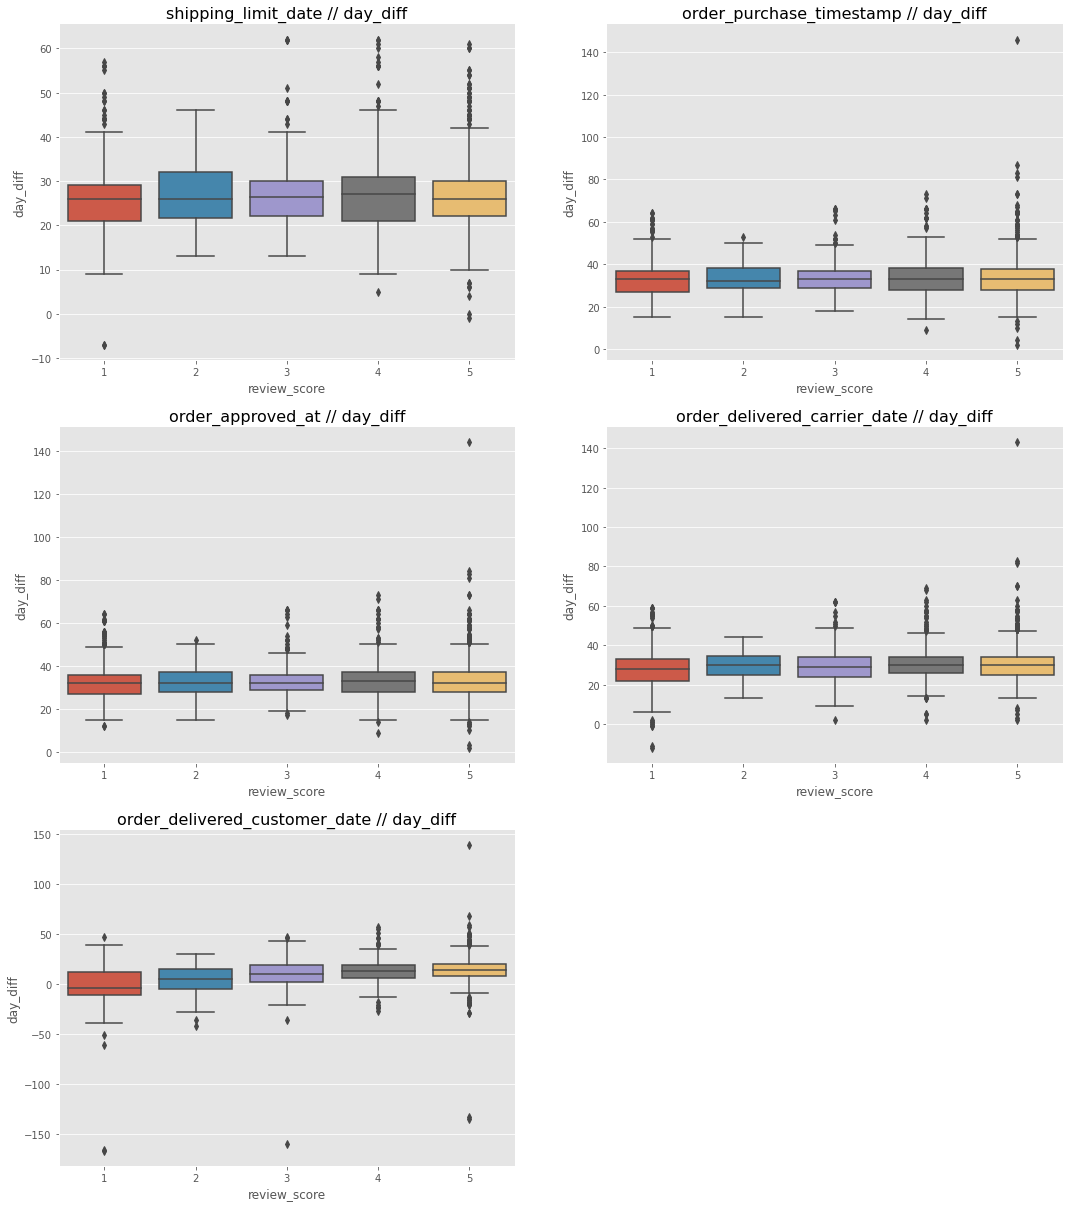

In [30]:
df_date = df_state[['shipping_limit_date', 
                    'order_purchase_timestamp', 'order_approved_at',
                    'order_delivered_carrier_date', 'order_delivered_customer_date',
                    'order_estimated_delivery_date', 'review_creation_date', 
                    'review_answer_timestamp', 'review_score']]

date_columns = ['shipping_limit_date', 
                'order_purchase_timestamp', 'order_approved_at',
                'order_delivered_carrier_date', 'order_delivered_customer_date']

# Número de colunas
number_of_columns = 2

# Número de linhas
number_of_rows = math.ceil(len(date_columns)/2)

# Criando figura que irá comportar os gráficos
fig = plt.figure(figsize=(18, 7 * number_of_rows))
    
    
# Loop para criação dos gráficos das features escolhidas
for index, col in enumerate(date_columns, 1):
    df_date['day_diff'] = (df_date['order_estimated_delivery_date'] - df_date[col]).dt.days
    
    # Criando subplot
    ax = fig.add_subplot(number_of_rows, number_of_columns, index)
    sns.boxplot(x = 'review_score', y = 'day_diff', data = df_date)

    # Definindo título
    ax.set_title(f'{col} // day_diff', fontsize=16, loc='center')

    # Eliminando partes do frame no gráfico
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

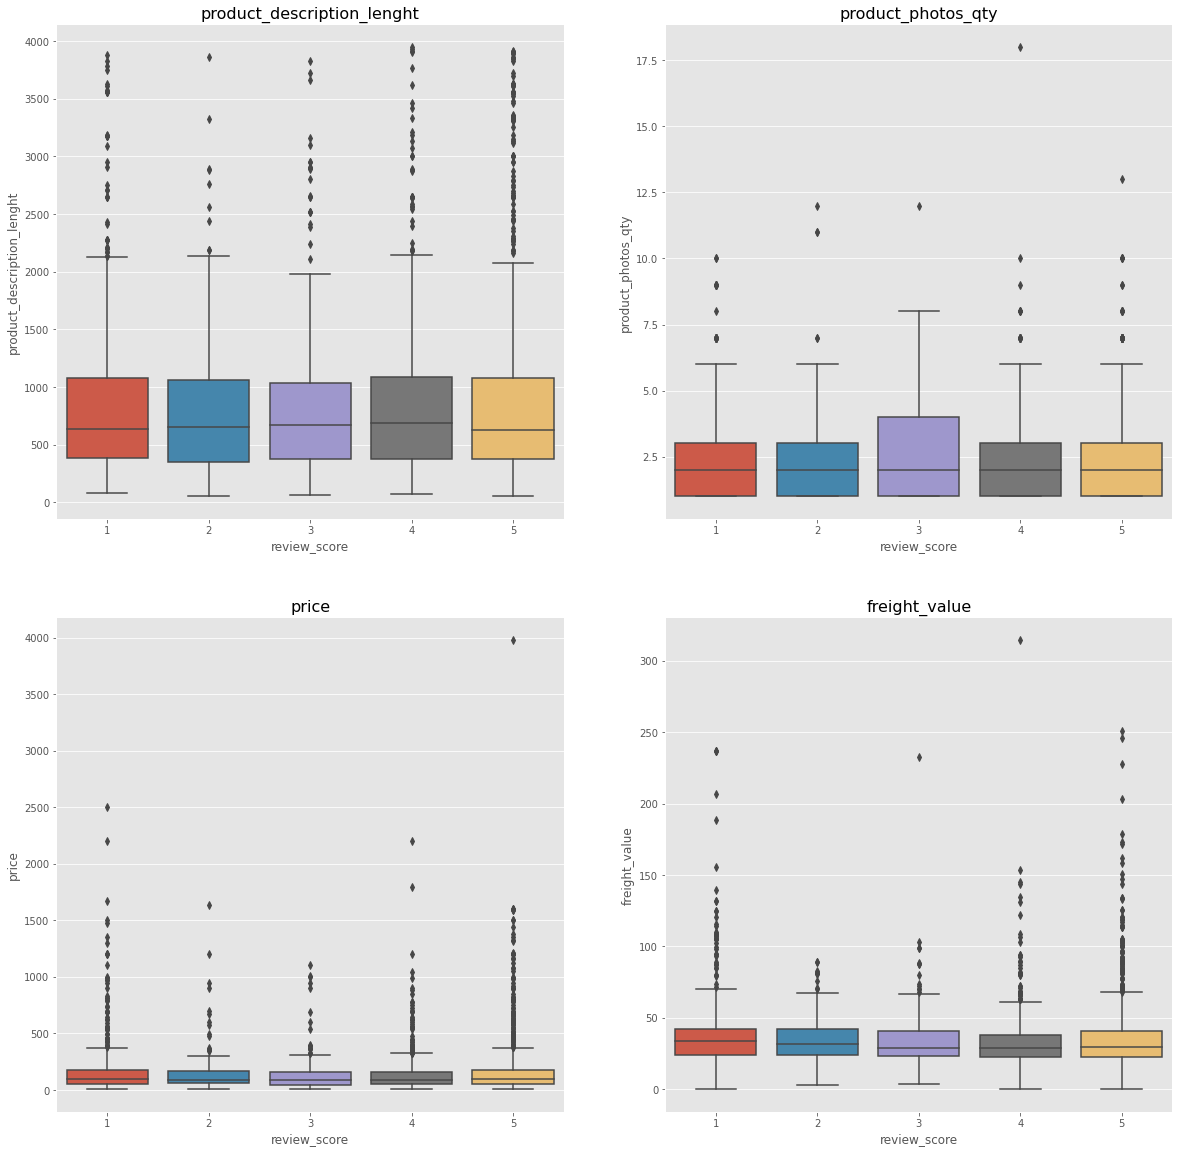

In [26]:
# Defining  features to be analyzed
features = ['product_description_lenght', 'product_photos_qty', 'price', 'freight_value']

# Defining target feature
target = 'review_score'

# Plotting BoxPLot charts 
plotBox(features, target, df_state)

In [36]:
mean_df = df_state.pivot_table(values  = ['product_description_lenght', 'product_photos_qty', 'price', 'freight_value'], 
                               columns = 'review_score', 
                               aggfunc = 'mean'
                               ).T.reset_index().sort_values(by='review_score', ascending=False)

mean_df

,review_score,freight_value,price,product_description_lenght,product_photos_qty
4,5,36.758271,165.141075,858.948855,2.387786
3,4,34.939323,142.889127,867.756318,2.402527
2,3,35.045379,130.623977,857.334601,2.520913
1,2,35.915391,163.559219,857.793651,2.349206
0,1,39.612601,176.015934,862.313112,2.391389


Once again, in these states the tendency for lower scores to be closely related to a **delay in product delivery** and higher **freight_values** is quite noticeable. This trend makes a lot of sense with a common complaint from customers of online stores.

# **Saving Dataframe**

In [23]:
df.to_csv('olist_reviews.csv', index=False)